In [41]:
import numpy as np
import os

import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [42]:
np.random.seed(42)

In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [44]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [45]:
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format = fig_extension, dpi = resolution)

In [46]:
import os
import pandas as pd

In [47]:
DOWNLOAD_ROOT = "https://github.com/uoelel/qm-data/raw/main/data/"

FORMANTS_PATH = os.path.join("datasets", "coretta2018")

FORMANTS_URL = DOWNLOAD_ROOT + "coretta2018/formants.csv"

In [48]:
def fetchload_formants_data(formants_url = FORMANTS_URL, formants_path = FORMANTS_PATH):
    os.makedirs(formants_path, exist_ok=True)
    csv_path = os.path.join(formants_path, "formants.csv")
    # "https://github.com/uoelel/qm-data/tree/main/data/coretta2018/token-measures.csv"
    # this joins the housing path "datasets/housing" with "housing.tgz"; "datasets/housing/housing.tgz"
    formants = pd.read_csv(formants_url)
    formants.to_csv(csv_path)
    return formants

In [49]:
formants = fetchload_formants_data()

In [50]:
formants.head()

,speaker,file,word,time,f1,f2,f3,f0,language,gender,...,item,ipa,c1,c1_phonation,vowel,anteropost,height,c2,c2_phonation,c2_place
0,it01,it01-001,pugu,1,307.981464,796.797789,2280.351430,137.387252,Italian,m,...,20,pugu,p,voiceless,u,back,high,g,voiced,velar
1,it01,it01-001,pugu,2,315.081373,778.824819,2124.163144,133.872931,Italian,m,...,20,pugu,p,voiceless,u,back,high,g,voiced,velar
2,it01,it01-001,pugu,3,316.421024,786.135514,2314.363768,133.792935,Italian,m,...,20,pugu,p,voiceless,u,back,high,g,voiced,velar
3,it01,it01-001,pugu,4,313.808563,789.315824,2373.979018,135.264386,Italian,m,...,20,pugu,p,voiceless,u,back,high,g,voiced,velar
4,it01,it01-001,pugu,5,312.862561,737.015794,2306.769983,137.173063,Italian,m,...,20,pugu,p,voiceless,u,back,high,g,voiced,velar


In [51]:
formants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   speaker       12006 non-null  object 
 1   file          12006 non-null  object 
 2   word          12006 non-null  object 
 3   time          12006 non-null  int64  
 4   f1            12006 non-null  float64
 5   f2            12006 non-null  float64
 6   f3            12006 non-null  float64
 7   f0            11751 non-null  float64
 8   language      12006 non-null  object 
 9   gender        12006 non-null  object 
 10  glottocode    12006 non-null  object 
 11  item          12006 non-null  int64  
 12  ipa           12006 non-null  object 
 13  c1            12006 non-null  object 
 14  c1_phonation  12006 non-null  object 
 15  vowel         12006 non-null  object 
 16  anteropost    12006 non-null  object 
 17  height        12006 non-null  object 
 18  c2            12006 non-nu

In [52]:
formants["speaker"].value_counts()

speaker
it01    1287
it02    1080
pl02     855
it13     648
pl06     648
pl05     648
pl04     648
pl03     648
it14     648
it12     648
it11     648
it09     648
pl07     648
it03     639
it04     630
it05     612
it07     423
Name: count, dtype: int64

In [53]:
# grouped = formants.groupby("speaker")
speaker_f1 = formants[["speaker", "word", "f1"]]
speaker_f1

,speaker,word,f1
0,it01,pugu,307.981464
1,it01,pugu,315.081373
2,it01,pugu,316.421024
3,it01,pugu,313.808563
4,it01,pugu,312.862561
...,...,...,...
12001,pl07,poto,580.689295
12002,pl07,poto,582.695481
12003,pl07,poto,560.163179
12004,pl07,poto,520.080832


In [54]:
speaker_f1["word"].value_counts()

word
poto    927
paga    918
pata    918
pogo    918
podo    909
pada    900
pugu    873
pudu    873
putu    873
paca    585
poco    576
pucu    531
paka    342
puku    342
poko    342
bucu     99
butu     99
bodo     99
boto     99
baga     99
boco     99
budu     99
bata     99
bogo     99
bada     99
bugu     99
baca     90
Name: count, dtype: int64

In [55]:
formants.describe()

,time,f1,f2,f3,f0,item
count,12006.000000,12006.000000,12006.000000,12006.000000,11751.000000,12006.000000
mean,5.000000,549.341125,1034.362338,2508.375867,166.455465,18.970765
std,2.582096,167.652866,299.756878,357.872203,50.996858,13.043313
min,1.000000,89.963890,293.156101,1078.435574,78.291111,1.000000
25%,3.000000,415.228133,824.545714,2263.929812,129.098905,9.000000
50%,5.000000,532.089988,970.333393,2440.768162,157.241714,18.000000
75%,7.000000,671.544801,1233.083550,2713.964835,193.199614,28.000000
max,9.000000,1205.265614,3204.740341,4105.851222,317.383621,44.000000


In [56]:
# the more options there are for formant values, the less likely that it will be one specific value
# more dispersed observations, because there are many possible formant values
# high standard deviation

In [57]:
formants["gender"].value_counts()

gender
m    6678
f    5328
Name: count, dtype: int64

array([[<Axes: title={'center': 'time'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>, <Axes: title={'center': 'f3'}>],
       [<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'item'}>]],
      dtype=object)

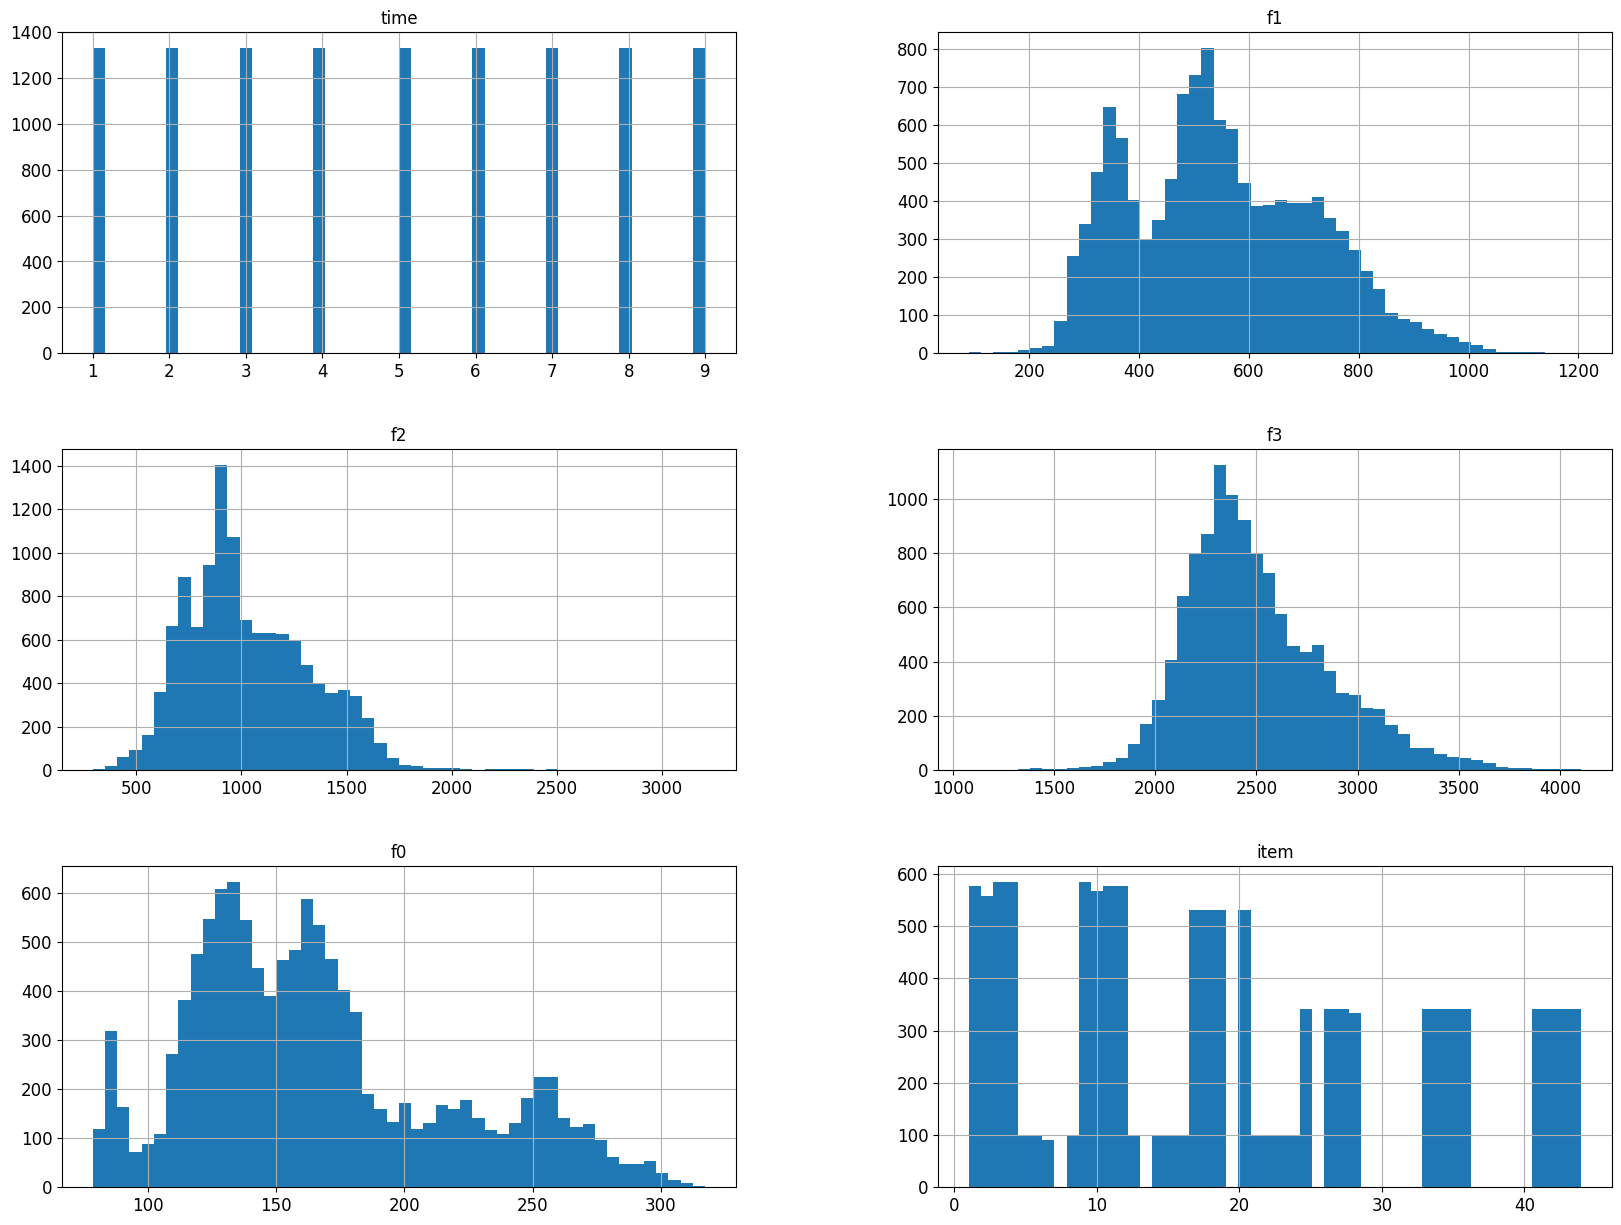

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
formants.hist(bins = 50, figsize = (20, 15))

In [59]:
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
train_set, test_set = split_train_test(formants, 0.2)
print(len(train_set))
print(len(test_set))
print(len(train_set) + len(test_set))

9605
2401
12006


In [61]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [62]:
formants_with_id = formants.reset_index()
train_set, test_set = split_data_with_id_hash(formants_with_id, 0.2, "index")

In [63]:
formants_with_id["id"] = formants["f1"] * 1000 + formants["f2"]
train_set, test_set = split_data_with_id_hash(formants_with_id, 0.2, "id")

In [64]:
formants_with_id.head()

,index,speaker,file,word,time,f1,f2,f3,f0,language,...,ipa,c1,c1_phonation,vowel,anteropost,height,c2,c2_phonation,c2_place,id
0,0,it01,it01-001,pugu,1,307.981464,796.797789,2280.351430,137.387252,Italian,...,pugu,p,voiceless,u,back,high,g,voiced,velar,308778.261748
1,1,it01,it01-001,pugu,2,315.081373,778.824819,2124.163144,133.872931,Italian,...,pugu,p,voiceless,u,back,high,g,voiced,velar,315860.197563
2,2,it01,it01-001,pugu,3,316.421024,786.135514,2314.363768,133.792935,Italian,...,pugu,p,voiceless,u,back,high,g,voiced,velar,317207.159212
3,3,it01,it01-001,pugu,4,313.808563,789.315824,2373.979018,135.264386,Italian,...,pugu,p,voiceless,u,back,high,g,voiced,velar,314597.879108
4,4,it01,it01-001,pugu,5,312.862561,737.015794,2306.769983,137.173063,Italian,...,pugu,p,voiceless,u,back,high,g,voiced,velar,313599.577115


In [68]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(formants, test_size = 0.2, random_state = 42)

In [72]:
print(test_set["f1"].isnull().sum())
print(test_set["f2"].isnull().sum())
print(test_set["f3"].isnull().sum())
print(test_set["f0"].isnull().sum())

0
0
0
45


In [ ]:
formants["